# Assignment #2 - Classification

<font color="red"> <b> Due: Feb 26 (Monday) 11:00 pm </b> </font>

## <font color="blue"> **Shama Zabeen Shaik** </font>

# I. Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.
The obective of this assignment is to perform classification on the selected dataset(training and testing) and apply the following algorithms:
1. ** Pocket Perceptron Algorithm **
2. ** Quadratic Discriminant Analysis **
3. ** Linear Discriminant Analysis **
4. ** Logistic Regression **

The above algorithms are implemented to the dataset containing the records from direct marketing campaigns of a Porteguese Banking Institution. The dataset is divided into train and test data and the experiments are performed on both the train and the test data and then the results are compared.


## <font color='#04B4AE'>II. INTRODUCTION OF DATA FOR CLASSIFICATION</font>


**SOURCE OF DATA :** 

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

**Data Set Description:**

The data set considered is from the direct marketing campaigns of a Porteguese Banking Institution. The campaigns were mostly phone call based, with more than one contact requirement to the client in order to access if the subscription was made or not.
The data set is a CSV file with 17 inputs, ordered by date.

The classification Goal is to predict if the client would subscribe (yes/no) a term deposit (variable y).

**The Data set has the following attributes**

**Input variables:**

***Bank Client Data:***

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-      employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
     related with the last contact of the current campaign:
     
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').

Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other Attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and Economic Context Attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_set = pd.read_csv(r"bank.csv")
data_set.head(6)

FileNotFoundError: File b'bank.csv' does not exist

In [24]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null object
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


**Checking if there are any missing values in any of the attributes in the data set. Since the total count of instances in all the attributes is the same, we can understand that there are no missing values and can now continue with the furthur stages of pre-processing**

In [3]:
data_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [4]:
data_set['day'].replace({ 1:'Sunday', 2: 'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7: 'Saturday'},inplace = True)
data_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,Thursday,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,Thursday,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,Thursday,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,Thursday,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,Thursday,may,673,2,-1,0,unknown,yes


Since the months in the data set are in the format of Character and not numbers, making the data symmetric by changing days from numbers to characters.

In [5]:
if np.any(data_set.isnull()) == True:
    data_set = data_set.fillna(0)

In [6]:
marital_dict = {"divorced":1,"married":2,"single":3}
education_dict = {'primary':1,'secondary':2,'tertiary':3,'unknown':4}
default_dict = {'no':0,'yes':1}
housing_dict = {'no':0,'yes':1}
loan_dict = {'no':0,'yes':1}
contact_dict = {'cellular':1,'telephone':2,'unknown':3}
month_dict = {"jan": 1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, 
            "jul": 7, "aug":8, "sep":9, "oct":10, "nov": 11, "dec": 12}
outcome_dict = {"failure":1,"other":2,"unknown":3,"success":4}
deposit_dict = {"no":0,"yes":1}

In [7]:
def marital_conv(s):
    return marital_dict[s]

def education_conv(s):
    return education_dict[s]

def default_conv(s):
    return default_dict[s]

def housing_conv(s):
    return housing_dict[s]

def loan_conv(s):
    return loan_dict[s]

def contact_conv(s):
    return contact_dict[s]

def month_conv(s):
    return month_dict[s]

def outcome_conv(s):
    return outcome_dict[s]

def deposit_conv(s):
    return deposit_dict[s]

In [8]:
bankData = pd.read_csv("bank.csv", delimiter = ',', skiprows =0,
                     converters={2:marital_conv,3:education_conv,4:default_conv,6:housing_conv,7:loan_conv,
                                 8:contact_conv,10:month_conv,15:outcome_conv,16:deposit_conv})
bankData = bankData.iloc[np.random.permutation(len(bankData))]
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4306,30,management,3,2,0,4642,1,0,1,21,11,528,1,-1,0,3,1
5058,32,blue-collar,2,2,0,225,1,0,1,17,4,574,1,150,1,1,1
6985,59,unknown,2,4,0,2443,0,0,3,20,6,8,8,-1,0,3,0
7831,54,unemployed,3,3,0,252,1,0,1,21,7,101,1,-1,0,3,0
8670,37,management,3,3,0,876,1,0,1,15,4,140,4,327,2,1,0


In [9]:
deposit_out = data_set.loc[:,'deposit']
deposit_out = np.where(deposit_out == 0,-1, 1)
deposit_out

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
from sklearn.preprocessing import LabelEncoder
bank = data_set.iloc[:,:-1]

lb_make = LabelEncoder()
bank["job"] = lb_make.fit_transform(bank["job"])

### Histogram and Normal Probability Plot

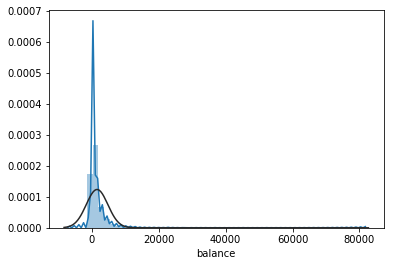

In [11]:

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
sns.distplot(data_set['balance'], fit = norm);
fig = plt.figure()
plt.show();

**Since the data is mostly skewed, and has very less error on skeweness, we are proceeding with the visualization.**

### BAR PLOT

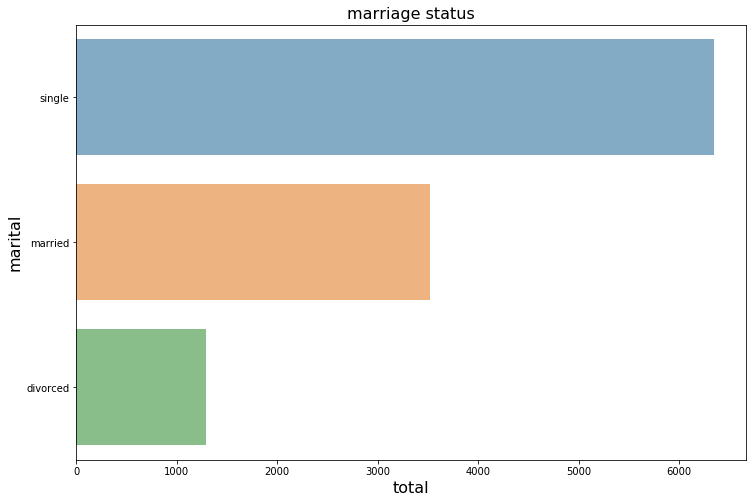

In [12]:
plt.figure(figsize=(12,8))
marital = data_set['marital'].value_counts()
sns.barplot(y=marital.index, x=marital.values, alpha=0.6)
plt.yticks(range(len(data_set['marital'].value_counts().index)), ['single', 'married','divorced'])
plt.title("marriage status", fontsize=16)
plt.xlabel("total", fontsize=16)
plt.ylabel("marital", fontsize=16)
plt.show();

## <font color ='blue'> BAR PLOT </font>

** *The above bar-plot shows the marital status of all the customers that were approached for the subscription. From the above plot, we can infer that the majority of the population that are being surved are singles and there could be a high probability of singles accepting more subsciptions.* **

*<font color= 'red'>We can also assume that there could a propability of the number of singles accepting the subsciption would be high in number compared to other sets of population as they stand the heighest in the total. </font>*

In [13]:
from sklearn.preprocessing import LabelEncoder
bank = bankData.iloc[:,:-1]

lb_make = LabelEncoder()
bank["job"] = lb_make.fit_transform(bank["job"])

## COUNT PLOT

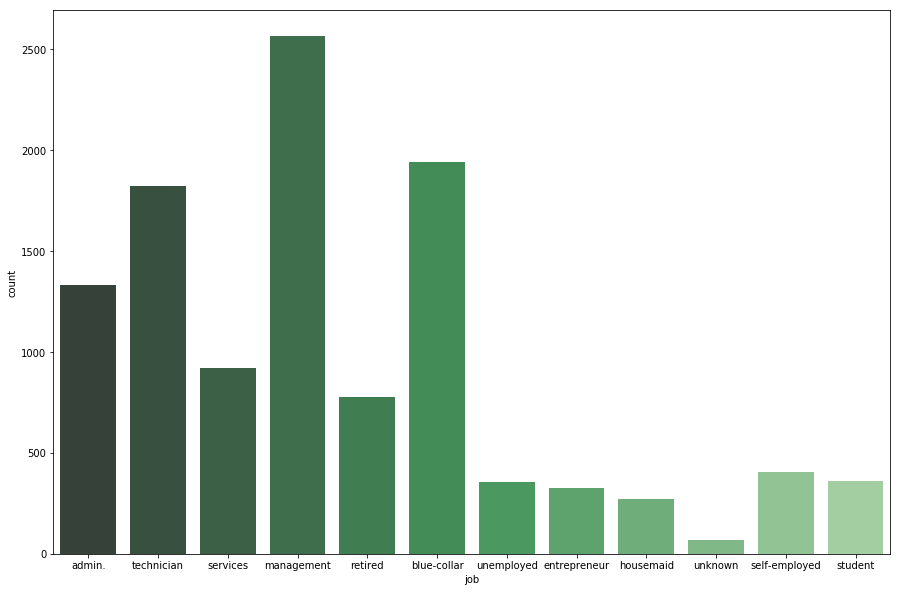

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(x="job", data = data_set, palette="Greens_d");
plt.show();

** Counting the number of employees in each job domain so as to have an over view of what could be the number of people activating the subscription from the number of people contacted for subscribing.
Of all the job roles, the people that are most likely to subscribe are most from management as there are more number of people from that job role.**

## BOX PLOT

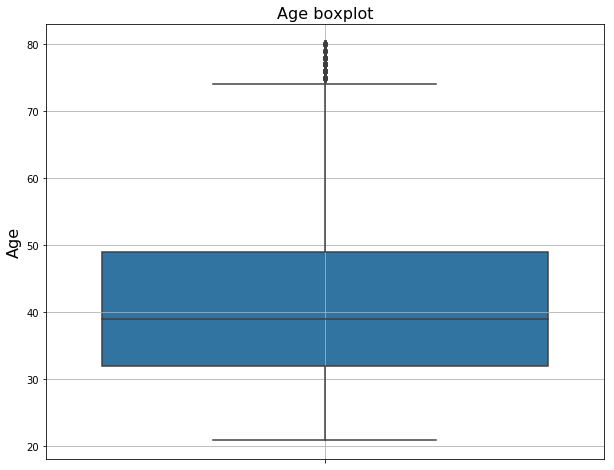

In [15]:
plt.figure(figsize=(12,8))
age=data_set[(data_set['age']>=21) & (data_set['age']<=80) ]
plt.figure(figsize=(10,8))
sns.boxplot( y=age['age'],data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.grid()
plt.show();

### BOX PLOT FOR AGE

**The median for the age is aroud 39 and most participants are aged between 33 - 49. **

## SCATTER PLOT

/Users/sshaik3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


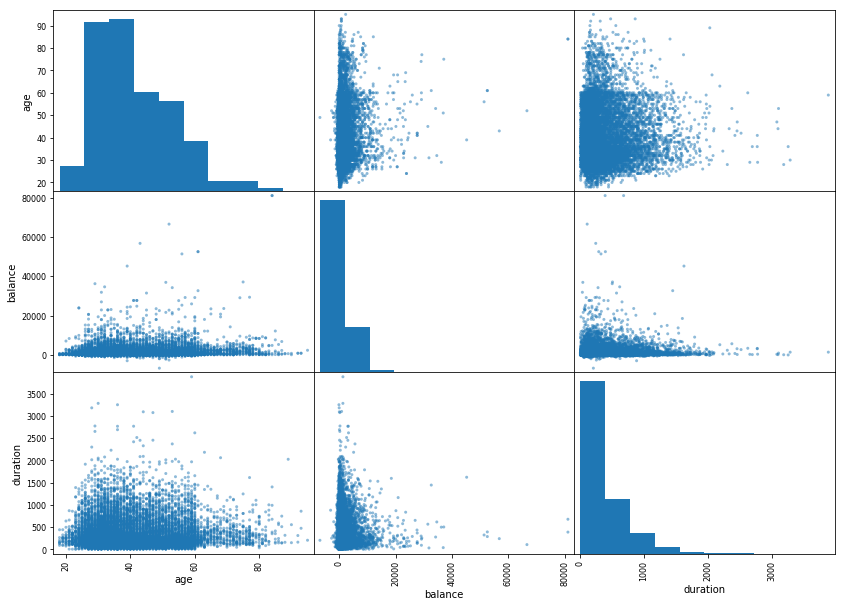

In [16]:
from pandas.tools.plotting import scatter_matrix

attributes = ['age','balance','duration',]
scatter_matrix(data_set[attributes], figsize = (14,10))
plt.show();

#### Scatter Plot:
**Some inferences that could be made from the above scatter plot are :** 
<br>

<font color='blue'> 1. As the age increases, the balance and duration left for payment decreases, also the age that has most amoiunt due is around 20-40 </font> 

<font color='blue'> 2. As the balance decreases, the duration left for payment decreases.

### BAR PLOT

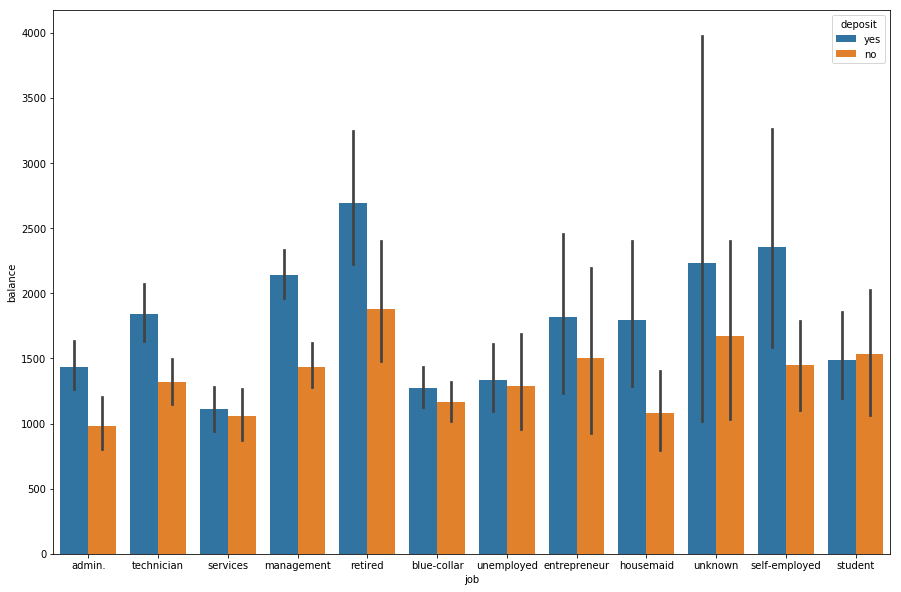

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(x="job", y="balance", hue="deposit", data=data_set);
plt.show();

## ** BAR PLOT**

**
The above plot is showing a comparision between the job and the balance of the customers that were approached for subscription. The plot shows the rate of acceptance of the subsciption of the term deposits vary with respect to job of the person.**

**Refering to the heighest 'yes' in the plot, the retired people are the one's that have most subsciptions, which says that since, they have no income now and have an amount in their bank as balance, it is more secured for them to have an automatic term deposit which could be used in times of emergence.**

**Referring to the student, the most subsciptions are 'no' as most of the students are dependent on their parents and not not-self employeed.**


**As the self-employeed people have an income the term-deposits are like a good source of savings and hence the subsciptions are mostly, yes.**


**People from the services job domain, have a very secured amount of income, so there might not be an immediate need of instant savings, and hence haven't accepted the subscription.
**

### PIE CHART AND COUNT PLOT

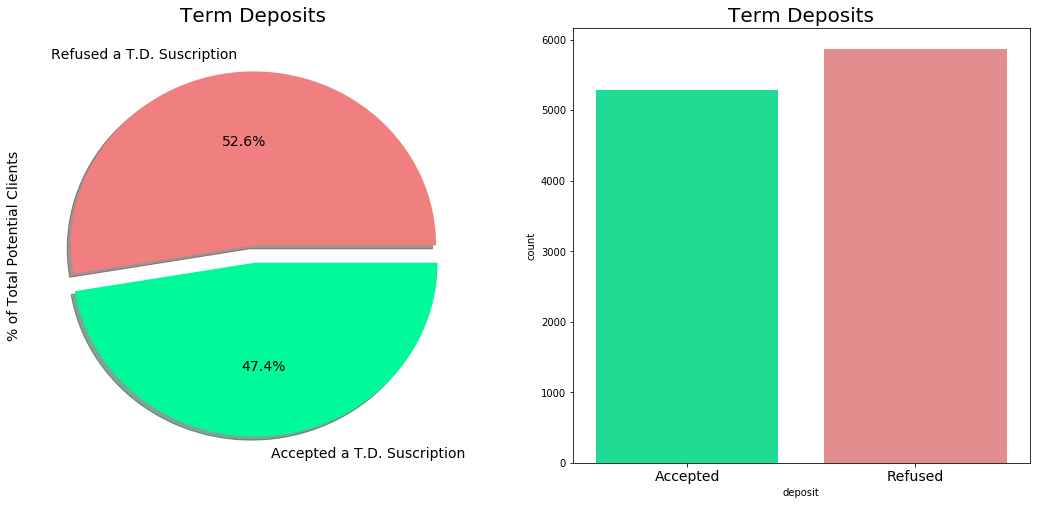

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=["#F08080", "#00FA9A"]
colors1=["#00FA9A","#F08080"]
labels = 'Refused a T.D. Suscription', 'Accepted a T.D. Suscription'
data_set['deposit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Term Deposits', fontsize=20)
ax[0].set_ylabel('% of Total Potential Clients', fontsize=14)
sns.countplot('deposit',data=data_set,ax=ax[1], palette=colors1)
ax[1].set_title('Term Deposits', fontsize=20)
ax[1].set_xticklabels(['Accepted', 'Refused'], fontsize=14)
plt.show()

### PIE CHART AND COUNT PLOT 

** The PIECHART gives the percentage of the people that are more like to accept the subscription and the count plot gives a number of the people subscribing or not subscribing. **

It can be inferred from the above visualizations that the number of subscriptions are going to be majorly refused and a slightly mess are going to be accepted by the people.

# III. Method


### A. Super Class Definition
1. ** Normalization :** Used for the scaling of the features on the data by subtracting each item with the mean value and then dividing it by the standard deviation.

2. **Partitioning :** To divide the data set into two parts, train and test data. On the train data, we apply the algorithm and make the model learn the algorithm and in the test step, we apply the results of the learning model to predict the outcome.

In [19]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def partition_data(self,X,T,ratio=[0.8,0.2]):
        assert(np.sum(ratio) == 1)
    
        idxs = np.random.permutation(X.index)
        N = X.shape[0]
    
        X_ = []
        T_ = []
    
        i = 0
        for j, r in enumerate(ratio):
            rows = int(round(N * r))
            if j == len(ratio) -1:
               X_.append(X.iloc[i:, :])
               T_.append(T.iloc[i:, :])        
            else:
                X_.append(X.iloc[i:i+rows, :])
                T_.append(T.iloc[i:i+rows, :])
        
            i+= rows
    
        return X_, T_
    
    # Confustion matrix 

    def confusion_matrix(self,Y,T):
        """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
        """
    
        if len(Y) != len(T):
            raise ValueError("Wrong prediction and target length!")
    
        classes = np.unique(T)
        n_classes = len(classes)
    
        cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
        Tidx = [T == c for c in classes]
        for c in classes:
            pred_idx = Y == c
            cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]    
        return cfm
    
    def precision(self,cfm):
        return cfm[1][1]/(cfm.sum(axis=1)[1])
    
    def recall(self,cfm):
        return cfm[1][1]/(cfm.sum(axis=0)[1])
    
    def specificity(self,cfm):
        return cfm[-1][-1]/(cfm.sum(axis=0)[-1])
    
    def f1(self,cfm):
        return 2 * ((self.precision(cfm) * self.recall(cfm)) / (self.precision(cfm) + self.recall(cfm)))
   
    def roc(self,Y,T):
        fpr, tpr, thresholds = metrics.roc_curve(Y,T, pos_label=None)
        plt.plot(fpr, tpr,linewidth=2, label= None)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.show()
    
    def roc_auc(self,Y,T):
        return roc_auc_score(Y,T)
    
    def allStats(self,Y,T):
        cfm = self.confusion_matrix(Y,T)
        print(pd.DataFrame([['TN','FN'],['FP','TP']],index=["-","+"],columns=["-","+"]))
        print(cfm)
        result = [self.precision(cfm),self.recall(cfm),self.specificity(cfm),self.f1(cfm),self.roc_auc(Y,T)]
        print(pd.DataFrame(result,index=["Precision","Recall","Specificity","F1 Score","ROC_AUC"],columns=["Result"]))
        self.roc(Y,T)
        return result
    
    abstractmethod
    def train(self, X, T):
        pass
    
    abstractmethod
    def use(self, X):
        pass 

# B. Pocket Algorithm for Training Perceptron

The Pocket Algorithm is an extension of the Perceptron Algorithm. This algorithm is used for training the Perceptron.
The Perceptron algorithm is used for supervised learning of binary classifiers that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not. It is a type of linear classifier. The algorithm allows for online learning, in that it processes elements in the training set one at a time.
A single perceptron is a linear model that applies a step function on the linear output. 
For classification, it iterates over the training examples, and update the weights in a way that would result in correct classification. The weights are updated as follows:

$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$

Once the weight is updated, on each iteration the weight is compared to check if it is better than the previous weight. If so the algorithm stores the best weight in its pocket.
Thus, $w_{pocket}$ will contain the best solution so far. 

## <h4> Implementation: PocketAlgorithm class and its methods </h4>

- **train method: **  Once the data is explored and partitioned to training set and a test set and apply transformation pipelines such as feature scaling to clean up and prepare the data for Machine Learning algorithms, we then select and train a Machine Learning model in the train method. The train method is where we compute the weights. We first check if the prediction on each of the training example computed using the previous value of weight is equal to the target train sample (we check the signs). If the signs are different we update the weight accordingly and call the compare method. The result of the compare method says which of the weights are better and stores the best weight in the pocket.

- **use method: ** After tweaking the models for a while, we eventually have a system that performs sufficiently well. The model makes a prediction by computing a weighted sum of the input features. We now evaluate the final model on the test set with the pocket weights.

- **__init__ method ** which is the constructor for the class

- **the self variable** is used like a reference to the current object

- **the class contains two attributes:** the learning rate alpha to decide on how much step must the weight increase/decrease on each iteration and the w_pocket to store the best value of the weight

In [20]:
from copy import deepcopy as copy
class PocketAlgorithm(Classifier): 
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.alpha = alpha
        self.w_pocket = None
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
            
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    def train(self, X, T):
        X = self.normalize(X)
        maxiter = 10
        N = X.shape[0]
        w = np.zeros(X.shape[1])
        self.w_pocket = copy(w)

        for i in range(maxiter):
    
            converged = True
            for k in np.random.permutation(N): 
                y = w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    w += self.alpha * T[k] * X[k]
                    converged = False
                
                    if self.compare(X, T, w, self.w_pocket) > 0: 
                        self.w_pocket[:] = w[:]
    
            if converged:
                 print("converged at ", i)
                 break

            print("End of training: ", i)
        
    def use(self, X):
        Xs = (X-self.meanX)/self.stdX
        return Xs @ self.w_pocket

End of training:  0
End of training:  1
End of training:  2
End of training:  3
End of training:  4
End of training:  5
End of training:  6
End of training:  7
End of training:  8
End of training:  9


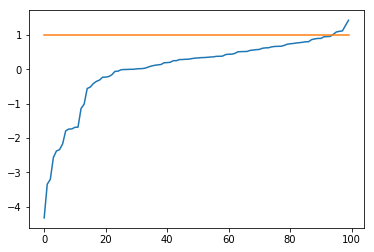

In [22]:
pa = PocketAlgorithm(0.1)

Xdata, Tdata = pa.partition_data(pd.DataFrame(bank), pd.DataFrame(deposit_out))

Xtrain, Xtest = [x_.as_matrix() for x_ in Xdata]
Ttrain, Ttest = [t_.as_matrix() for t_ in Tdata]

pd.set_option('display.max_rows', 500)
pa.train(Xtrain[:400],Ttrain[:400])
Y = pa.use(Xtest[:100])
plt.plot(np.sort(Y,0))
plt.plot(np.sort(Ttest[:100],0))



$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
$
### C. Quadratic Discriminant Analysis (QDA)

For a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid \xv)$ for the sample $\xv$ with the positive label. Thus, 

$$
P(T = +1 \mid \xv) > P(T = -1 \mid \xv).
$$

The inequality will be the opposite in case of the negative samples. 

Using this inequality and the Gaussian Assumption, we can come up with following inequality: 

$$
-\frac{1}{2} \ln \vert \boldsymbol\Sigma_+ \vert - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) > -\frac{1}{2} \ln \vert \boldsymbol\Sigma_- \vert - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)
$$

*Gaussian Assumption:*
$$
p(\xv \mid T = k) = \frac{1}{(2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}}} e^{ -\frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) }.
$$


Since both terms have the same cosmetics, we can define the discriminant function $\delta_k(\xv)$ as

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

In QDA analysis, our job is to find the class which gives maximum probability for the above discriminant function.

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

In [167]:
class QDA(Classifier):
    def train(self, X, T):        
        self.classes = np.unique(T)
        self.prior = {}
        self.sigma = {}
        self.mu = {}
        
        X = self.normalize(X) 
        N = np.shape(X)[0]
        
        for k in self.classes:
            indices = np.where(T == k)[0]
            self.prior[k] = len(indices) / N
            self.sigma[k] = np.cov(X[indices].T)
            self.mu[k] = np.mean(X[indices], 0)
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        N = np.shape(X)[0]
        T = []
        d = {}
        for k in self.classes:
            sigma_inv = np.linalg.inv(self.sigma[k])
            diffv = X - self.mu[k]
            d[k] = -0.5 * np.log(np.linalg.det(self.sigma[k])) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(self.prior[k])
        
        for n in range(N):
            max_d = -math.inf
            max_k = None
            for k in self.classes:
                if d[k][n] > max_d:
                    max_k = k
                    max_d = d[k][n]
                T.append(k)
        return T

### D. Linear Discriminant Analysis (LDA)

The problems with QDA are:
* Maintaining the covariance matrix for each class is not cheap
* The data is under-sampled, the resulting class boundary has high chance of over-fitting

LDA instead use same covariance for all classes
Let $\boldsymbol\Sigma_k = \boldsymbol\Sigma$. 

$$
\begin{align*}
\delta_+(\xv) &> \delta_-(\xv) \\ 
 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ + \ln P(T = +1) &>  \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- - \frac{1}{2}\boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_-  + \ln P(T = -1)
\end{align*}
$$

From the above equation (same as QDA), we can remove the quadratic term in our discriminant function and we will end up with: 

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$

In [168]:
class LDA(Classifier):
    def train(self, X, T):        
        self.classes = np.unique(T)
        self.prior = {}
        self.mu = {}
        
        X = self.normalize(X) 
        N = np.shape(X)[0]
        
        self.sigma = np.cov(X.T)
        
        for k in self.classes:
            indices = np.where(T == k)[0]
            self.prior[k] = len(indices) / N
            self.mu[k] = np.mean(X[indices], 0)
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        N = np.shape(X)[0]
        T = []
        d = {}
        sigma_inv = np.linalg.inv(self.sigma)
        
        for k in self.classes:
            d[k] = np.sum(np.dot(X, sigma_inv) * self.mu[k] \
                - 0.5 * np.dot(self.mu[k], sigma_inv) * self.mu[k] \
                + np.log(self.prior[k]), axis=1)
        
        for n in range(N):
            max_d = -math.inf
            max_k = None
            for k in self.classes:
                if d[k][n] > max_d:
                    max_k = k
                    max_d = d[k][n]
                T.append(k)
        return T

### E. Logistic Regression

Logistic regression model predicts $P(T=k \mid \xv)$ for every class k. Reconsidering the Linear Regression model:
$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

Thus, for Logistic Regression we have:

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = \yv.
$$

The error function for Logistic Regression is defined as:
$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$
It is also called *cross-entropy* error function.

Applying Gradient Descent on this error function:
$$
\wv_j \leftarrow \wv_j + \alpha \Xm^\top \Big(  t_{*,j} - g_j(\Xm)\Big).
$$


In [169]:
class LogisticRegression(Classifier):
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def g(self, X, w):
        return self.softmax(X @ w) 
    
    def train(self, X, T):
        self.classes = np.unique(T).tolist()
        X = self.normalize(X)
        X = self.add_ones(X)
        
        niter = 1
        alpha = 0.1
        self.w = np.random.rand(np.shape(X)[1], len(self.classes))
        Tmatrix = np.zeros((np.shape(X)[0], len(self.classes)))
        
        for i,t in enumerate(T):
            Tmatrix[i][self.classes.index(t)] = 1
            
        for step in range(niter):
            y = self.g(X, self.w)
            self.w += alpha * X.T @ (Tmatrix - y)
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        X = self.add_ones(X)
        T = np.argmax(self.g(X, self.w), 1)
        return [self.classes[t] for t in T]

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

## POCKET ALGORITHM

In [177]:
train = data_set.sample(frac = .75)
test = data_set.sample(frac = .25)

In [ ]:
classifier = Pocket()
X = data_set.sample()
Y = [-1 if y == 'yes' else 1 for y in X['deposit'].values]
m = np.shape(X)[0]
classifier.train(X[['balance','duration']].values, Y)
T = classifier.use(X[['balance','duration','age']].values)
print(T)

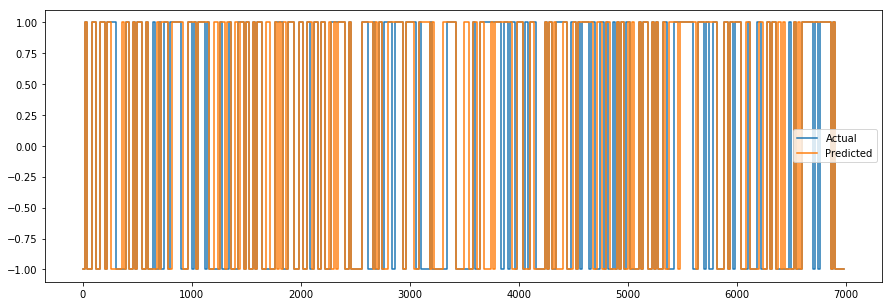

In [215]:
classifier = Pocket()
X = train.sample(7000)
Y = [-1 if y == 'yes' else 1 for y in X['deposit'].values ]
m = np.shape(X)[0]
classifier.train(X[['balance','duration','age']].values, Y)
T = classifier.use(X[['balance','duration','age']].values)
plt.figure(figsize=(15, 5))
plt.step(range(m)[0::20], Y[0::20], label='Actual')
plt.step(range(m)[0::20], T[0::20], label='Predicted')
plt.legend()
plt.show()

In [124]:
display(Markdown('### Confusion Matrix'))
matrix = pd.crosstab(pd.Series(X['deposit'].values, name='Actual'), pd.Series(['yes' if t == -1 else 'no' for t in T], name='Predicted'))
print('Accuary: ' + str((matrix['yes']['yes'] + matrix['no']['no']) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix['yes']['yes'] / (matrix['yes']['yes'] + matrix['no']['yes']), 2)
recall = round(matrix['yes']['yes'] / (matrix['yes']['yes'] + matrix['yes']['no']), 2)
print('Precision (yes): ' + str(precision))
print('Recall (yes): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix['no']['no'] / (matrix['no']['no'] + matrix['yes']['no']), 2)
recall = round(matrix['no']['no'] / (matrix['no']['no'] + matrix['no']['yes']), 2)
print('Precision (no): ' + str(precision))
print('Recall (yes): ' + str(recall))

matrix

### Confusion Matrix

Accuary: 75.7142857143%

Precision (yes): 0.74
Recall (yes): 0.75

Precision (no): 0.77
Recall (yes): 0.77


Predicted,no,yes
Actual,,
no,282,84
yes,86,248


## QDA

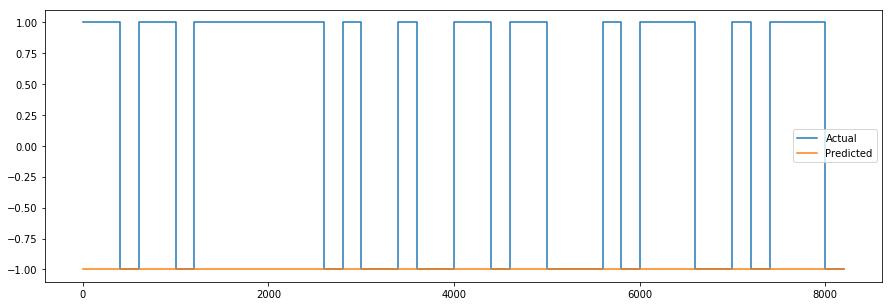

In [196]:
classifier = QDA()
X = train
Y = [-1 if y == 'yes' else 1 for y in X['deposit'].values ]
m = np.shape(X)[0]
classifier.train(X[['balance','duration']].values, Y)
T = classifier.use(X[['balance','duration']].values)
plt.figure(figsize=(15, 5))
plt.step(range(m)[0::200], Y[0::200], label='Actual')
plt.step(range(m)[0::200], T[0::400], label='Predicted')
plt.legend()
plt.show()

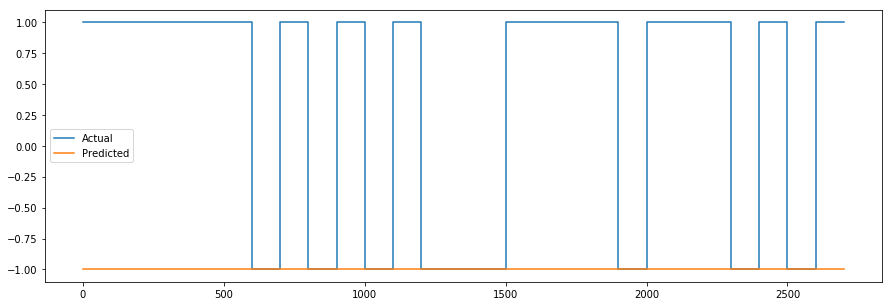

In [207]:
classifier = QDA()
X = test
Y = [-1 if y == 'yes' else 1 for y in X['deposit'].values ]
m = np.shape(X)[0]
classifier.train(X[['balance','duration']].values, Y)
T = classifier.use(X[['balance','duration']].values)
plt.figure(figsize=(15,5))
plt.step(range(m)[0::100], Y[0::100], label='Actual')
plt.step(range(m)[0::100], T[0::200], label='Predicted')
plt.legend()
plt.show()

In [126]:
display(Markdown('### Confusion Matrix'))
matrix = pd.crosstab(pd.Series(X['deposit'].values, name='Actual'), pd.Series(['yes' if t == -1 else 'no' for t in T], name='Predicted'))
print('Accuary: ' + str((matrix['yes']['yes'] + matrix['no']['no']) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix['yes']['yes'] / (matrix['yes']['yes'] + matrix['no']['yes']), 2)
recall = round(matrix['yes']['yes'] / (matrix['yes']['yes'] + matrix['yes']['no']), 2)
print('Precision (yes): ' + str(precision))
print('Recall (yes): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix['no']['no'] / (matrix['no']['no'] + matrix['yes']['no']), 2)
recall = round(matrix['no']['no'] / (matrix['no']['no'] + matrix['no']['yes']), 2)
print('Precision (no): ' + str(precision))
print('Recall (no): ' + str(recall))

matrix

### Confusion Matrix

Accuary: 48.3%

Precision (yes): 0.48
Recall (yes): 0.46

Precision (no): 0.48
Recall (no): 0.5


Predicted,no,yes
Actual,,
no,251,268
yes,249,232


## LDA 

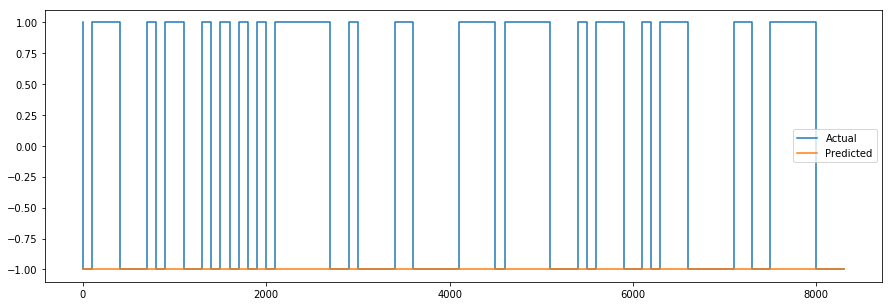

In [206]:
classifier = LDA()
X = train
Y = [-1 if y == 'yes' else 1 for y in X['deposit'].values ]
m = np.shape(X)[0]
classifier.train(X[['balance','duration','age']].values, Y)
T = classifier.use(X[['balance','duration','age']].values)
plt.figure(figsize=(15,5))
plt.step(range(m)[0::100], Y[0::100], label='Actual')
plt.step(range(m)[0::100], T[0::200], label='Predicted')
plt.legend()
plt.show()

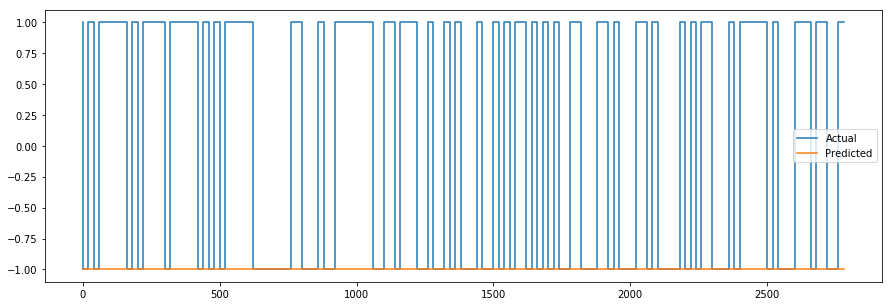

In [205]:
classifier = LDA()
X = test
Y = [-1 if y == 'yes' else 1 for y in X['deposit'].values ]
m = np.shape(X)[0]
classifier.train(X[['balance','duration','age']].values, Y)
T = classifier.use(X[['balance','duration','age']].values)
plt.figure(figsize=(15,5))
plt.step(range(m)[0::20], Y[0::20], label='Actual')
plt.step(range(m)[0::20], T[0::40], label='Predicted')
plt.legend()
plt.show()

In [128]:
display(Markdown('### Confusion Matrix'))
matrix = pd.crosstab(pd.Series(X['deposit'].values, name='Actual'), pd.Series(['yes' if t == -1 else 'no' for t in T], name='Predicted'))
print('Accuary: ' + str((matrix['yes']['yes'] + matrix['no']['no']) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix['yes']['yes'] / (matrix['yes']['yes'] + matrix['no']['yes']), 2)
recall = round(matrix['yes']['yes'] / (matrix['yes']['yes'] + matrix['yes']['no']), 2)
print('Precision (yes): ' + str(precision))
print('Recall (yes): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix['no']['no'] / (matrix['no']['no'] + matrix['yes']['no']), 2)
recall = round(matrix['no']['no'] / (matrix['no']['no'] + matrix['no']['yes']), 2)
print('Precision (no): ' + str(precision))
print('Recall (no): ' + str(recall))

matrix

### Confusion Matrix

Accuary: 50.8571428571%

Precision (yes): 0.51
Recall (yes): 0.49

Precision (no): 0.51
Recall (no): 0.53


Predicted,no,yes
Actual,,
no,186,180
yes,164,170


## LOGISTIC REGRESSION

/Users/sshaik3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/sshaik3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


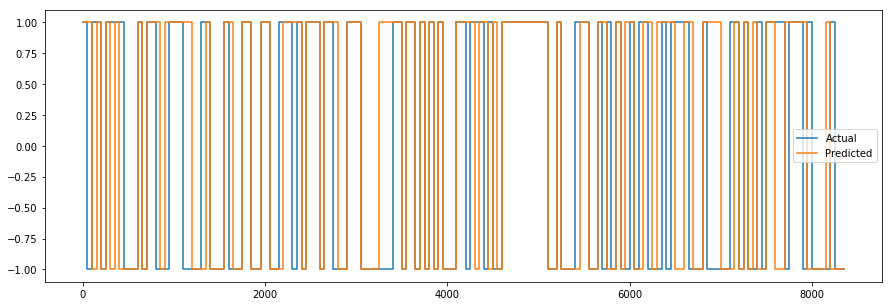

In [203]:
classifier = LogisticRegression()
X = train
Y = [-1 if y == 'yes' else 1 for y in X['deposit'].values ]
m = np.shape(X)[0]
classifier.train(X[['balance','duration','age']].values, Y)
T = classifier.use(X[['balance','duration','age']].values)
plt.figure(figsize=(15,5))
plt.step(range(m)[0::50], Y[0::50], label='Actual')
plt.step(range(m)[0::50], T[0::50], label='Predicted')
plt.legend()
plt.show()

/Users/sshaik3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/sshaik3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


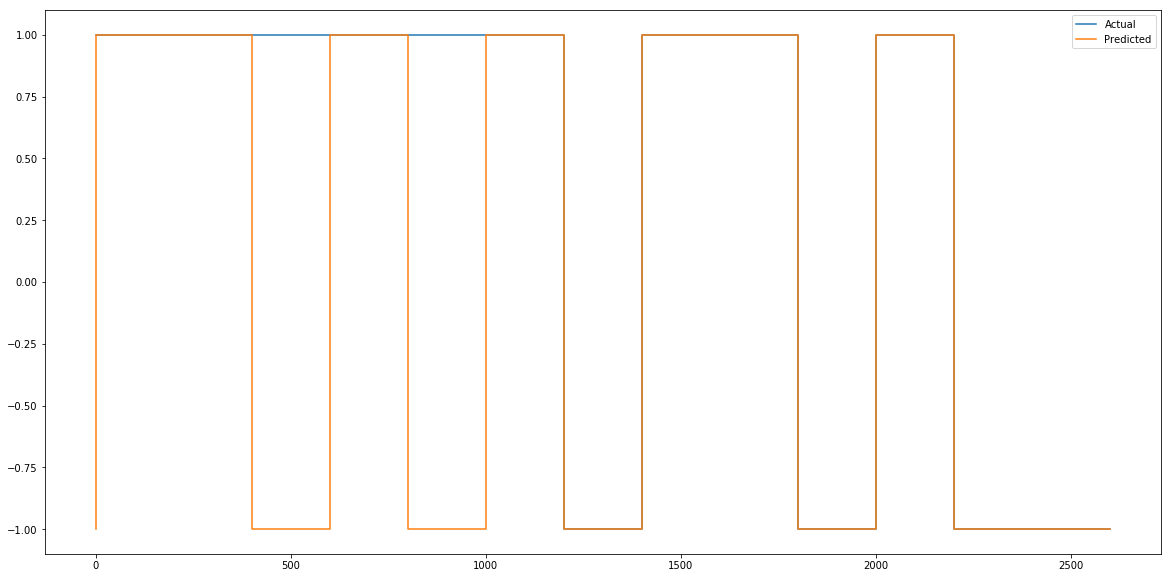

In [189]:
classifier = LogisticRegression()
X = test
Y = [-1 if y == 'yes' else 1 for y in X['deposit'].values ]
m = np.shape(X)[0]
classifier.train(X[['balance','duration','age']].values, Y)
T = classifier.use(X[['balance','duration','age']].values)
plt.figure(figsize=(20, 10))
plt.step(range(m)[0::200], Y[0::200], label='Actual')
plt.step(range(m)[0::200], T[0::200], label='Predicted')
plt.legend()
plt.show()

In [130]:
display(Markdown('### Confusion Matrix'))
matrix = pd.crosstab(pd.Series(X['deposit'].values, name='Actual'), pd.Series(['yes' if t == -1 else 'no' for t in T], name='Predicted'))
print('Accuary: ' + str((matrix['yes']['yes'] + matrix['no']['no']) * 100 / m) + '%')

print()

# Precision & recall for class <=50K
precision = round(matrix['yes']['yes'] / (matrix['yes']['yes'] + matrix['no']['yes']), 2)
recall = round(matrix['yes']['yes'] / (matrix['yes']['yes'] + matrix['yes']['no']), 2)
print('Precision (yes): ' + str(precision))
print('Recall (yes): ' + str(recall))

print()

## Precision & recall for class >50K
precision = round(matrix['no']['no'] / (matrix['no']['no'] + matrix['yes']['no']), 2)
recall = round(matrix['no']['no'] / (matrix['no']['no'] + matrix['no']['yes']), 2)
print('Precision (no): ' + str(precision))
print('Recall (no): ' + str(recall))

matrix

### Confusion Matrix

Accuary: 72.8571428571%

Precision (yes): 0.61
Recall (yes): 0.78

Precision (no): 0.84
Recall (no): 0.7


Predicted,no,yes
Actual,,
no,306,59
yes,131,204


# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

# References

## <font color='#04B4AE'> REFERENCES:</font>


https://archive.ics.uci.edu/ml/datasets/Bank+Marketing <br>

https://www.kaggle.com/chaitanya94/house-sales-in-king-county/data<br>

https://seaborn.pydata.org/tutorial/categorical.html<br>

https://python-graph-gallery.com/seaborn/ <br>

https://seaborn.pydata.org/examples/index.html <br>

http://www.scipy-lectures.org/intro/matplotlib/index.html <br>

https://seaborn.pydata.org/generated/seaborn.countplot.html <br>

# Extra Credit

Search for a ordinal data set and apply your classifiers to it. 
Repeat the experiments on it. 
Do you have different observation from previous results? 
Were you able to observe that we discussed in class about logistic regression? 
For a full extra credit point, you need to discuss all bullet points in Results section.     

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)